# 3. Debug vals_to_mode_defs

In [1]:
import argparse
import glob
import os
import pandas as pd

In [2]:
DEFAULT_POM_FILE = "/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocpho_rrtmg_c130709_kPOM0.04.nc"

In [3]:
DEFAULT_MODE_DEF = "'mam5_mode1:accum:=', 'A:num_a1:N:num_c1:num_mr:+',\
         'A:so4_a1:N:so4_c1:sulfate:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/sulfate_rrtmg_c080918.nc:+', 'A:pom_a1:N:pom_c1:p-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocpho_rrtmg_c130709_kPOM0.04.nc:+',\
         'A:soa_a1:N:soa_c1:s-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocphi_rrtmg_c100508.nc:+', 'A:bc_a1:N:bc_c1:black-c:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/bcpho_rrtmg_c100508.nc:+',\
         'A:dst_a1:N:dst_c1:dust:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/dust_aeronet_rrtmg_c141106.nc:+', 'A:ncl_a1:N:ncl_c1:seasalt:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ssam_rrtmg_c100508.nc:+',\
         'A:mom_a1:N:mom_c1:m-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/poly_rrtmg_c130816.nc', 'mam5_mode2:aitken:=',\
         'A:num_a2:N:num_c2:num_mr:+', 'A:so4_a2:N:so4_c2:sulfate:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/sulfate_rrtmg_c080918.nc:+',\
         'A:soa_a2:N:soa_c2:s-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocphi_rrtmg_c100508.nc:+', 'A:ncl_a2:N:ncl_c2:seasalt:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ssam_rrtmg_c100508.nc:+',\
         'A:mom_a2:N:mom_c2:m-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/poly_rrtmg_c130816.nc', 'mam5_mode3:coarse:=',\
         'A:num_a3:N:num_c3:num_mr:+', 'A:dst_a3:N:dst_c3:dust:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/dust_aeronet_rrtmg_c141106.nc:+',\
         'A:ncl_a3:N:ncl_c3:seasalt:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ssam_rrtmg_c100508.nc:+', 'A:so4_a3:N:so4_c3:sulfate:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/sulfate_rrtmg_c080918.nc:+',\
         'A:bc_a3:N:bc_c3:black-c:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/bcpho_rrtmg_c100508.nc:+', 'A:pom_a3:N:pom_c3:p-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocpho_rrtmg_c130709_kPOM0.04.nc:+',\
         'A:soa_a3:N:soa_c3:s-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocphi_rrtmg_c100508.nc:+', 'A:mom_a3:N:mom_c3:m-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/poly_rrtmg_c130816.nc',\
         'mam5_mode4:primary_carbon:=', 'A:num_a4:N:num_c4:num_mr:+',\
         'A:pom_a4:N:pom_c4:p-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocpho_rrtmg_c130709_kPOM0.04.nc:+', 'A:bc_a4:N:bc_c4:black-c:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/bcpho_rrtmg_c100508.nc:+',\
         'A:mom_a4:N:mom_c4:m-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/poly_rrtmg_c130816.nc', 'mam5_mode5:strat_coarse:=',\
         'A:num_a5:N:num_c5:num_mr:+', 'A:so4_a5:N:so4_c5:sulfate:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/sulfate_rrtmg_c080918.nc'"

In [7]:
param_sampled_csv = "/glade/u/home/jnug/work/codes/e3sm-ppe-aci/ppev0_PI/ppev0_PI_parameter_vals_annotated_RESAMPLE.csv"
resampled_path = "/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/RESAMPLED/"

In [8]:
def zero_pad(num):
    """ Zero-pad a number (0-999) into a 3-digit string
    """
    if num < 10:
        num_pad = "00" + str(num)
    elif num >= 10 and num < 100:
        num_pad = "0" + str(num)
    elif num >= 100:
        num_pad = str(num)
    return num_pad

In [9]:
pom_path = "POM_ppe/"

In [12]:
default_file=DEFAULT_POM_FILE

In [13]:
# drop file path and extension
pom_file_name = default_file.split("/")[-1][:-3]
pom_full_path = os.path.dirname(default_file) + "/" + pom_path

# get the sampled values
df = pd.read_csv(param_sampled_csv)
n_samples = len(df)

In [16]:
    # get a list of all files in the new directory & make sure you have them all
    new_files_pattern = pom_full_path + "*.nc"
    new_file_list = list(sorted(glob.glob(new_files_pattern)))

In [17]:
    
    # if you have resampled files, add those too
    if resampled_path is not None:
        resampled = True
        pom_full_path_rs = resampled_path
        rs_files_pattern = pom_full_path_rs + "*.nc"
        rs_file_list = list(sorted(glob.glob(rs_files_pattern)))
        new_file_list += rs_file_list
        print(new_file_list) # FOR TESTING
    else:
        resampled = False

['/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_001.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_002.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_003.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_004.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_005.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_006.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_007.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_008.nc', '/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_009.nc', '/glade/c

In [18]:
for file in new_file_list:
    print(file)

/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_001.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_002.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_003.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_004.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_005.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_006.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_007.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_008.nc
/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/ocpho_rrtmg_c130709_kPOM0.04_009.nc
/glade/campaign/uwyo/wyom0191/cime/in

In [19]:

    # check that you have the same number of files as samples
    if len(new_file_list) != n_samples:
        raise Exception("Mismatch between number of files in {p} ({n1}) and number of samples ({n2})!".format(p=pom_path, n1=len(new_file_list), n2=n_samples))

In [21]:
default_mode_def = DEFAULT_MODE_DEF

In [22]:
    mode_def_list = [[]]*n_samples
    for i, sim in enumerate(range(1, n_samples+1)):
        new_file = pom_full_path + pom_file_name + "_{s}.nc".format(s=zero_pad(sim))
        new_mode_def = default_mode_def.replace(default_file, new_file)
        mode_def_list[i] = new_mode_def

In [29]:
for i, new_file in enumerate(new_file_list):
    new_mode_def = default_mode_def.replace(default_file, new_file)
    mode_def_list[i] = new_mode_def
    

In [30]:
mode_def_list[126]

"'mam5_mode1:accum:=', 'A:num_a1:N:num_c1:num_mr:+',         'A:so4_a1:N:so4_c1:sulfate:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/sulfate_rrtmg_c080918.nc:+', 'A:pom_a1:N:pom_c1:p-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/POM_ppe/RESAMPLED/ocpho_rrtmg_c130709_kPOM0.04_127.nc:+',         'A:soa_a1:N:soa_c1:s-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ocphi_rrtmg_c100508.nc:+', 'A:bc_a1:N:bc_c1:black-c:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/bcpho_rrtmg_c100508.nc:+',         'A:dst_a1:N:dst_c1:dust:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/dust_aeronet_rrtmg_c141106.nc:+', 'A:ncl_a1:N:ncl_c1:seasalt:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/ssam_rrtmg_c100508.nc:+',         'A:mom_a1:N:mom_c1:m-organic:/glade/campaign/uwyo/wyom0191/cime/inputdata/atm/cam/physprops/poly_rrtmg_c130816.nc', 'mam5_mode2:aitken:=',         'A:num_a2:N:num_c2:num_mr:+'

# 2. try resampling with teh mini test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import qmc


In [2]:
# List of parameters that have integer values
INTEGER_PARAMS = ["n_so4_monolayers_pcage"]

In [3]:
seed = 23
n_samples = 20
param_ranges_csv = "/glade/work/jnug/codes/e3sm-ppe-aci/mini_test/test_parameter_ranges.csv"
out_file = "/glade/work/jnug/codes/e3sm-ppe-aci/mini_test/test_parameter_vals_freeform.txt"
resample = True

In [4]:
df_params = pd.read_csv(param_ranges_csv, header=0)
parameters = df_params["parameter"].values
n_params = len(parameters)
l_bounds = df_params["min"].values
u_bounds = df_params["max"].values


In [5]:
# create a sample in the unit hypercube & scale it
if n_samples is None:
    n_samples = 10*n_params
sampler = qmc.LatinHypercube(d=n_params, seed=seed)
sample = sampler.random(n=n_samples)
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)

# if you're resampling for additional parameters - make an additional sample
if resample:
    new_sample = sampler.random(n=n_samples)
    new_sample_scaled = qmc.scale(new_sample, l_bounds, u_bounds)

In [6]:
# make an annotated data frame
# (if resample=True, it will contain old samples followed by new)
if resample:
    combined_samples = np.vstack((sample_scaled, new_sample_scaled))
    df_resampled = pd.DataFrame(combined_samples,
                                index=np.arange(1, (n_samples*2)+1),
                                columns=parameters)
else:
    df_sampled = pd.DataFrame(sample_scaled,
                              index=np.arange(1, n_samples+1),
                              columns=parameters)

In [7]:
# for categorical/integer parameters, map the sampled floats to corresponding integers in the range
for param in INTEGER_PARAMS:
    if param in parameters:
        pind = np.where(parameters == param)[0][0]
        lower = int(l_bounds[pind])
        upper = int(u_bounds[pind])
        if resample:
            sample_param = sample[:, pind]
            new_sample_param = new_sample[:, pind]
            resample_param = np.concatenate((sample_param, new_sample_param))
            resample_map_int = [lhs.map_to_integer(x, lower, upper) for x in resample_param]
            df_resampled[param] = resample_map_int
        else:
            sample_param = sample[:, pind]
            sample_map_int = [map_to_integer(x, lower, upper) for x in sample_param]
            df_sampled[param] = sample_map_int
        print("...Sampled parameter range for \'{}\' mapped from floats to ints.".format(param))
    else:
        print("...Ignoring parameter \'{}\' for float-->int mapping; not found in parameter ranges csv file.".format(param))


...Ignoring parameter 'n_so4_monolayers_pcage' for float-->int mapping; not found in parameter ranges csv file.


In [13]:
# drop POM, if it's in the parameter list (won't get sampled by Dakota)
if "POM_hygroscopicity_param" in parameters:
    drop_POM = True
    if resample:
        df_resampled_no_pom = df_resampled.drop(columns="POM_hygroscopicity_param")
    else:
        df_sampled_no_pom = df_sampled.drop(columns="POM_hygroscopicity_param")
    params_no_pom = parameters[parameters != "POM_hygroscopicity_param"]
else:
    drop_POM = False

In [14]:
# save freeform formatted files for Dakota
if resample:
    out_file_rs = out_file[:-4] + "_RESAMPLED.txt"
    df_resampled.to_csv(out_file_rs, sep="\t", header=False, index=False)
    if drop_POM:
        out_file_rs_no_pom = out_file_rs[:-4] + "_no_POM.txt"
        df_resampled_no_pom.to_csv(out_file_rs_no_pom, sep="\t", header=False, index=False)
        extra = " and {p}".format(p=out_file_rs_no_pom)
    else:
        extra = ""
    print("Parameter values files saved to {o}{e}.".format(o=out_file_rs, e=extra))
else:
    df_sampled.to_csv(out_file, sep="\t", header=False, index=False)
    if drop_POM:
        out_file_no_pom = out_file[:-4] + "_no_POM.txt"
        df_sampled_no_pom.to_csv(out_file_no_pom, sep="\t", header=False, index=False)
        extra = " and {p}.".format(p=out_file_no_pom)
    else:
        extra = ""
    print("Parameter values files saved to {o}{e}.".format(o=out_file, e=extra))

Parameter values files saved to /glade/work/jnug/codes/e3sm-ppe-aci/mini_test/test_parameter_vals_freeform_RESAMPLED.txt.


In [16]:
save_annotated = True

In [17]:
# also save in a human-readable annotated format for user reference
# (Dakota won't use this)
if save_annotated:
    if resample:
        out_file_rs_annot = out_file_rs.replace("txt", "csv").replace("freeform", "annotated")
        df_rs_annotated = pd.read_csv(out_file_rs, header=None, names=parameters, delimiter="\t")
        df_rs_annotated.to_csv(out_file_rs_annot, index=False)
        if drop_POM:
            out_file_rs_annot_no_pom = out_file_rs_annot[:-4] + "_no_POM.csv"
            df_rs_annotated_no_pom = pd.read_csv(out_file_rs_no_pom, header=None, names=params_no_pom, delimiter="\t")
            df_rs_annotated_no_pom.to_csv(out_file_rs_annot_no_pom, index=False)
            extra = "{p}.".format(p=out_file_rs_annot_no_pom)
        else:
            extra = ""
        print("Annotated parameter values files saved to {o}{e}.".format(o=out_file_rs_annot, e=extra))
    else:
        out_file_annot = out_file.replace("txt", "csv").replace("freeform", "annotated")
        df_annotated = pd.read_csv(out_file, header=None, names=parameters, delimiter="\t")
        df_annotated.to_csv(out_file_annot, index=False)
        if drop_POM:
            out_file_annot_no_pom = out_file_annot[:-4] + "_no_POM.csv"
            df_annotated_no_pom = pd.read_csv(out_file_no_pom, header=None, names=params_no_pom, delimiter="\t")
            df_annotated_no_pom.to_csv(out_file_annot_no_pom, index=False)
            extra = " and {p}.".format(p=out_file_annot_no_pom)
        else:
            extra = ""
        print("Annotated parameter values files saved to {o}{e}.".format(o=out_file_annot, e=extra))

Annotated parameter values files saved to /glade/work/jnug/codes/e3sm-ppe-aci/mini_test/test_parameter_vals_annotated_RESAMPLED.csv.


# 1. test resampling

In [1]:
import lhs_sampling_for_dakota as lhs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import math
from scipy.stats import qmc


In [3]:
in_file = "/glade/work/jnug/codes/e3sm-ppe-aci/ppev0_PD_param_ranges.csv"
out_file = "test_double_sample.txt"


In [4]:
param_ranges_csv = in_file

In [5]:
# use the SAME SEED
seed = 23

In [6]:
# these would be in the config file
resample = True
n_samples = 125 


In [7]:
n_samples

125

In [ ]:
# Inside fo the main function....

In [8]:
df_params = pd.read_csv(param_ranges_csv, header=0)

In [9]:
parameters = df_params["parameter"].values
n_params = len(parameters)
l_bounds = df_params["min"].values
u_bounds = df_params["max"].values

In [12]:
# create a sample in the unit hypercube & scale it
if n_samples is None:
    n_samples = 10*n_params
sampler = qmc.LatinHypercube(d=n_params, seed=seed)
sample = sampler.random(n=n_samples)
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)

# if you want new/additional samples, do it again
# (the first one above will be exactly the same as the original sample bc it's seeded!)
if resample:
    new_sample = sampler.random(n=n_samples)
    new_sample_scaled = qmc.scale(new_sample, l_bounds, u_bounds)

In [26]:
if resample:
    combined_samples = np.vstack((sample_scaled, new_sample_scaled))
    df_resampled = pd.DataFrame(combined_samples,
                              index=np.arange(1, (n_samples*2)+1),
                              columns=parameters)

else:
    df_sampled = pd.DataFrame(sample_scaled,
                          index=np.arange(1, n_samples+1),
                          columns=parameters)
    

In [29]:
# for categorical/integer parameters, map the sampled floats to corresponding integers in the range
for param in lhs.INTEGER_PARAMS:
    if param in parameters:
        pind = np.where(parameters == param)[0][0]
        lower = int(l_bounds[pind])
        upper = int(u_bounds[pind])
        if resample:
            sample_param = sample[:, pind]
            new_sample_param = new_sample[:, pind]
            resample_param = np.concatenate((sample_param, new_sample_param))
            resample_map_int = [lhs.map_to_integer(x, lower, upper) for x in resample_param]
            df_resampled[param] = resample_map_int
        else:
            sample_param = sample[:, pind]
            sample_map_int = [map_to_integer(x, lower, upper) for x in sample_param]
            df_sampled[param] = sample_map_int
        print("...Sampled parameter range for \'{}\' mapped from floats to ints.".format(param))
    else:
        print("...Ignoring parameter \'{}\' for float-->int mapping; not found in parameter ranges csv file.".format(param))

...Sampled parameter range for 'n_so4_monolayers_pcage' mapped from floats to ints.


In [31]:
df_resampled["n_so4_monolayers_pcage"]

1      8
2      4
3      1
4      7
5      2
      ..
246    4
247    2
248    6
249    5
250    8
Name: n_so4_monolayers_pcage, Length: 250, dtype: int64

In [32]:
df_resampled

,p3_mincdnc,p3_nc_autocon_expon,p3_qc_autocon_expon,p3_autocon_coeff,p3_accret_coeff,p3_wbf_coeff,p3_embryonic_rain_size,sol_facti_cloud_borne,dms_emis_scale,n_so4_monolayers_pcage,...,microp_aero_wsub_scale,zmconv_autocon_coeff,zmconv_accret_coeff,zmconv_nc_autocon_expon,zmconv_qc_autocon_expon,POM_hygroscopicity_param,aer_sol_factb,so2_oh_gprx_scale,so2_o3_aqrx_scale,so2_h2o2_aqrx_scale
1,1.986121e+07,-1.338263,2.161184,35962.255236,92.474863,0.151455,0.000020,0.759128,2.885668,8,...,4.475148,37810.167332,75.440037,-1.689996,2.366992,0.054385,0.068834,1.735491,0.621784,1.136732
2,2.659744e+07,-1.613253,2.888098,19245.571251,129.133584,0.497102,0.000034,0.585461,1.982816,4,...,0.896494,34739.423029,185.480057,-0.471582,2.855775,0.008217,0.046923,2.343722,1.926673,1.538536
3,5.133741e+06,-1.510378,2.589935,24202.597335,131.939965,0.170802,0.000022,0.518613,0.635152,1,...,1.389185,30834.001920,68.310683,-0.503469,2.411377,0.024826,0.036569,1.838292,0.724198,1.439046
4,1.849452e+07,-0.992584,2.204087,41286.745098,105.528823,0.915661,0.000023,0.998212,1.426554,7,...,0.685416,38408.684558,126.146845,-1.979994,2.814710,0.010975,0.064121,1.921392,0.573841,0.574679
5,2.526031e+07,-1.994759,3.255108,15968.194487,64.653923,0.700646,0.000017,0.530229,0.735016,2,...,0.995866,36070.626670,193.626512,-0.522807,2.495615,0.016140,0.052083,2.310806,0.902590,1.699819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1.853794e+07,-0.914569,2.934912,42606.394728,208.973418,0.562385,0.000037,0.584014,2.659742,4,...,0.633578,23968.258691,167.039270,-1.681053,3.455671,0.005682,0.031653,2.629553,1.130236,1.079049
247,2.572815e+07,-1.505677,2.388890,41024.704796,166.654313,0.181912,0.000031,0.660841,2.402759,2,...,4.604860,37841.075112,192.261718,-1.160530,3.570027,0.042017,0.088945,1.077829,1.611434,1.818115
248,1.599600e+07,-1.217763,2.264684,33138.091585,66.079100,0.599128,0.000032,0.655356,2.695508,6,...,1.912059,21400.142223,152.081160,-1.476325,2.186256,0.098152,0.084239,0.772115,1.801075,0.950900
249,2.702228e+07,-0.329348,3.566528,38278.334882,95.511764,0.773810,0.000030,0.813244,2.235140,5,...,2.789771,30977.231417,109.891169,-0.179445,2.547693,0.019449,0.051761,0.536719,1.603747,0.840686


### Compare to the original file

In [34]:
df_sampled_og = pd.read_csv("/glade/work/jnug/codes/e3sm-ppe-aci/ppev0_PD/ppev0_PD_parameter_vals_annotated.csv",
                           header=0)


In [35]:
df_sampled_og

,p3_mincdnc,p3_nc_autocon_expon,p3_qc_autocon_expon,p3_autocon_coeff,p3_accret_coeff,p3_wbf_coeff,p3_embryonic_rain_size,sol_facti_cloud_borne,dms_emis_scale,n_so4_monolayers_pcage,...,microp_aero_wsub_scale,zmconv_autocon_coeff,zmconv_accret_coeff,zmconv_nc_autocon_expon,zmconv_qc_autocon_expon,POM_hygroscopicity_param,aer_sol_factb,so2_oh_gprx_scale,so2_o3_aqrx_scale,so2_h2o2_aqrx_scale
0,1.986121e+07,-1.338263,2.161184,35962.255236,92.474863,0.151455,0.000020,0.759128,2.885668,8,...,4.475148,37810.167332,75.440037,-1.689996,2.366992,0.054385,0.068834,1.735491,0.621784,1.136732
1,2.659744e+07,-1.613253,2.888098,19245.571251,129.133584,0.497102,0.000034,0.585461,1.982816,4,...,0.896494,34739.423029,185.480057,-0.471582,2.855775,0.008217,0.046923,2.343722,1.926673,1.538536
2,5.133741e+06,-1.510378,2.589935,24202.597335,131.939965,0.170802,0.000022,0.518613,0.635152,1,...,1.389185,30834.001920,68.310683,-0.503469,2.411377,0.024826,0.036569,1.838292,0.724198,1.439046
3,1.849452e+07,-0.992584,2.204087,41286.745098,105.528823,0.915661,0.000023,0.998212,1.426554,7,...,0.685416,38408.684558,126.146845,-1.979994,2.814710,0.010975,0.064121,1.921392,0.573841,0.574679
4,2.526031e+07,-1.994759,3.255108,15968.194487,64.653923,0.700646,0.000017,0.530229,0.735016,2,...,0.995866,36070.626670,193.626512,-0.522807,2.495615,0.016140,0.052083,2.310806,0.902590,1.699819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2.257384e+07,-0.277760,3.184215,39774.566981,227.543704,0.217968,0.000030,0.690086,1.616665,3,...,4.114919,18488.113105,159.101549,-1.869637,2.318002,0.098424,0.050701,2.754332,1.974622,1.683598
121,1.759538e+07,-1.797599,2.661363,29547.535606,225.408313,0.324374,0.000028,0.609152,2.311438,4,...,3.312056,36911.996526,84.358142,-0.650551,3.099670,0.039267,0.079284,2.072139,1.792218,0.647567
122,8.725288e+06,-1.102933,3.338931,37538.619372,124.100170,0.629459,0.000023,0.774001,1.591125,2,...,4.755187,44602.531607,115.467732,-1.937982,2.476341,0.040889,0.043013,2.009898,1.472402,1.042193
123,7.739265e+06,-0.152578,2.548372,28182.421077,184.052574,0.635342,0.000030,0.649100,0.510554,4,...,1.516383,25882.855278,102.443430,-0.687203,2.826508,0.062334,0.091729,2.431652,0.863822,1.982276


In [36]:
df_sampled_og["p3_mincdnc"]

0      1.986121e+07
1      2.659744e+07
2      5.133741e+06
3      1.849452e+07
4      2.526031e+07
           ...     
120    2.257384e+07
121    1.759538e+07
122    8.725288e+06
123    7.739265e+06
124    2.299765e+07
Name: p3_mincdnc, Length: 125, dtype: float64

In [42]:
df_resampled[125:]

,p3_mincdnc,p3_nc_autocon_expon,p3_qc_autocon_expon,p3_autocon_coeff,p3_accret_coeff,p3_wbf_coeff,p3_embryonic_rain_size,sol_facti_cloud_borne,dms_emis_scale,n_so4_monolayers_pcage,...,microp_aero_wsub_scale,zmconv_autocon_coeff,zmconv_accret_coeff,zmconv_nc_autocon_expon,zmconv_qc_autocon_expon,POM_hygroscopicity_param,aer_sol_factb,so2_oh_gprx_scale,so2_o3_aqrx_scale,so2_h2o2_aqrx_scale
126,8.436790e+06,-0.006764,2.475062,17660.091377,87.705643,0.850939,0.000040,0.926488,0.861166,4,...,3.904388,40409.057018,69.527102,-0.661866,2.267539,0.034605,0.075354,0.433252,0.545678,1.588793
127,1.678814e+07,-0.679859,3.267243,34023.805324,213.032030,0.414951,0.000020,0.647072,2.037165,3,...,3.587394,24559.774065,84.523493,-0.350721,3.284816,0.086311,0.078132,2.953840,1.407741,1.274652
128,1.461921e+07,-1.205058,2.377099,29594.060144,99.381192,0.173745,0.000022,0.550525,1.880532,1,...,4.798059,41945.275785,168.920311,-1.812288,2.127445,0.051048,0.070111,2.507671,1.902366,0.893077
129,9.307262e+06,-1.734306,3.523702,20069.533017,198.547005,0.222851,0.000032,0.846010,2.895459,2,...,1.271204,34537.980882,129.723065,-0.697455,3.420408,0.083574,0.054935,1.571259,1.242101,0.643183
130,1.209900e+07,-0.833373,2.958817,20948.493865,154.475857,0.200220,0.000020,0.997806,1.249812,5,...,4.404351,20852.719773,65.115263,-0.816014,3.053877,0.015405,0.097677,2.384181,1.094290,0.648183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1.853794e+07,-0.914569,2.934912,42606.394728,208.973418,0.562385,0.000037,0.584014,2.659742,4,...,0.633578,23968.258691,167.039270,-1.681053,3.455671,0.005682,0.031653,2.629553,1.130236,1.079049
247,2.572815e+07,-1.505677,2.388890,41024.704796,166.654313,0.181912,0.000031,0.660841,2.402759,2,...,4.604860,37841.075112,192.261718,-1.160530,3.570027,0.042017,0.088945,1.077829,1.611434,1.818115
248,1.599600e+07,-1.217763,2.264684,33138.091585,66.079100,0.599128,0.000032,0.655356,2.695508,6,...,1.912059,21400.142223,152.081160,-1.476325,2.186256,0.098152,0.084239,0.772115,1.801075,0.950900
249,2.702228e+07,-0.329348,3.566528,38278.334882,95.511764,0.773810,0.000030,0.813244,2.235140,5,...,2.789771,30977.231417,109.891169,-0.179445,2.547693,0.019449,0.051761,0.536719,1.603747,0.840686


In [59]:
# Slight rounding error in some of them (% difference is ~10^-14%) for p3_mincdnc
# for param with the smallest magnitude (zmconv_micro_dcs), it's still small - (10^-11%)
# param = "zmconv_micro_dcs"
param = "POM_hygroscopicity_param"
no_overlap = [x for x in df_resampled[param][:n_samples].values if x not in df_sampled_og[param].values]
print(len(no_overlap))

for i in range(125):
    x = df_resampled[param].values[i]
    y = df_sampled_og[param].values[i]
    if x != y:
        print("{}:".format(i), x, y, (x-y)/y*100.)#x, y)


115
1: 0.00821685945074102 0.008216859450741 2.533410950560244e-13
2: 0.024826490222010562 0.0248264902220105 2.51546008222292e-13
3: 0.010975108408915569 0.0109751084089155 6.322392130787974e-13
4: 0.01614006923227762 0.0161400692322776 1.2897516988397792e-13
5: 0.03462078394461318 0.0346207839446131 2.405108069768097e-13
6: 0.09546441702537233 0.0954644170253723 2.907426293532187e-14
7: 0.045054501953440226 0.0450545019534402 6.160444442225068e-14
8: 0.029159084916637507 0.0291590849166375 2.3796679229628554e-14
9: 0.07313826114753506 0.073138261147535 9.48736515612539e-14
10: 0.06819882868370403 0.068198828683704 4.069802392700193e-14
11: 0.02289079776778596 0.0228907977677859 2.7281725070783984e-13
12: 0.038313901728700174 0.0383139017287001 1.9921707134777148e-13
13: 0.012403733443552962 0.0124037334435529 5.034778070599766e-13
15: 0.07390052145059625 0.0739005214505962 7.511604808954969e-14
17: 0.04827747995627196 0.0482774799562719 1.2935647260737341e-13
18: 0.06087433210319883 

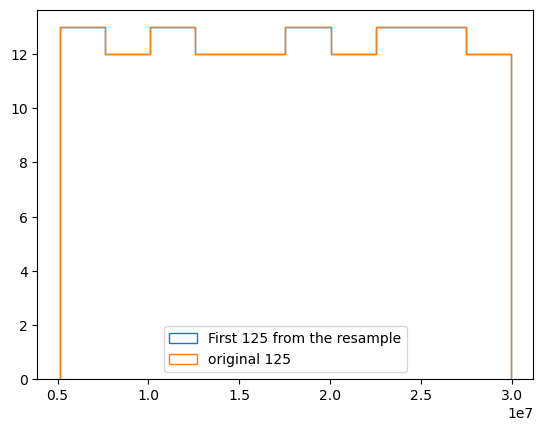

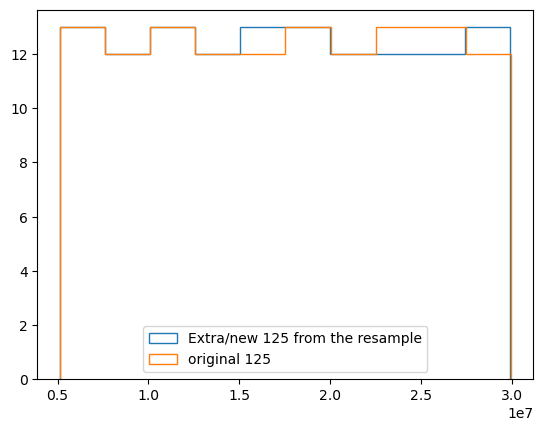

In [53]:
plt.hist(df_resampled["p3_mincdnc"][:125], histtype="step", label="First 125 from the resample")
plt.hist(df_sampled_og["p3_mincdnc"], histtype="step", label="original 125")
plt.legend()
plt.show()

plt.hist(df_resampled["p3_mincdnc"][125:], histtype="step", label="Extra/new 125 from the resample")
plt.hist(df_sampled_og["p3_mincdnc"], histtype="step", label="original 125")
plt.legend()
plt.show()


In [56]:
# no overlap between them
overlap = [x for x in df_resampled[:n_samples].values[125:] if x in df_sampled_og.values]
print(len(overlap))

0
